# Labeled Faces In The Wild Deep Learning Classification


## Desription

The LFW (Labeled Faces In The Wild) dataset is composed of 5479 clases (different persons) for more than 13000 images.

## Initialization

In [219]:
# IMSIZE = [250, 250, 3]
DATASET_PATH = "../datasets/lfw_funneled"

## Load and split dataset

In [220]:
import tensorflow as tf

batch_size = 32
SEED = 123
w, h, l = 94, 125, 3

train_ds = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                       validation_split=0.2,
                                                       subset="training",
                                                       seed=SEED,
                                                       image_size=(h, w),
                                                       batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(DATASET_PATH,
                                                     validation_split=0.2,
                                                     subset="validation",
                                                     seed=SEED,
                                                     image_size=(h, w),
                                                     batch_size=batch_size)

class_names = train_ds.class_names
n_classes = len(class_names)

Found 2115 files belonging to 423 classes.
Using 1692 files for training.
Found 2115 files belonging to 423 classes.
Using 423 files for validation.


## Show images infos

In [221]:
print(class_names)
print(f"Number of classes = {n_classes}")
print(f"Image dimensions: {w}x{h}x{l}")
print(f"Number of classes: {n_classes}")

['Abdullah_Gul', 'Adrien_Brody', 'Ahmed_Chalabi', 'Ai_Sugiyama', 'Al_Gore', 'Al_Sharpton', 'Alan_Greenspan', 'Alastair_Campbell', 'Albert_Costa', 'Alejandro_Toledo', 'Ali_Naimi', 'Allyson_Felix', 'Alvaro_Uribe', 'Amelia_Vega', 'Amelie_Mauresmo', 'Ana_Guevara', 'Ana_Palacio', 'Andre_Agassi', 'Andy_Roddick', 'Angela_Bassett', 'Angela_Merkel', 'Angelina_Jolie', 'Ann_Veneman', 'Anna_Kournikova', 'Antonio_Banderas', 'Antonio_Palocci', 'Ari_Fleischer', 'Ariel_Sharon', 'Arminio_Fraga', 'Arnold_Schwarzenegger', 'Arnoldo_Aleman', 'Ashanti', 'Atal_Bihari_Vajpayee', 'Ben_Affleck', 'Benazir_Bhutto', 'Benjamin_Netanyahu', 'Bernard_Law', 'Bertie_Ahern', 'Bill_Clinton', 'Bill_Frist', 'Bill_Gates', 'Bill_Graham', 'Bill_McBride', 'Bill_Simon', 'Billy_Crystal', 'Binyamin_Ben-Eliezer', 'Bob_Graham', 'Bob_Hope', 'Bob_Stoops', 'Boris_Becker', 'Brad_Johnson', 'Britney_Spears', 'Bulent_Ecevit', 'Calista_Flockhart', 'Cameron_Diaz', 'Carla_Del_Ponte', 'Carlos_Menem', 'Carlos_Moya', 'Carmen_Electra', 'Carrie-An

## Show images

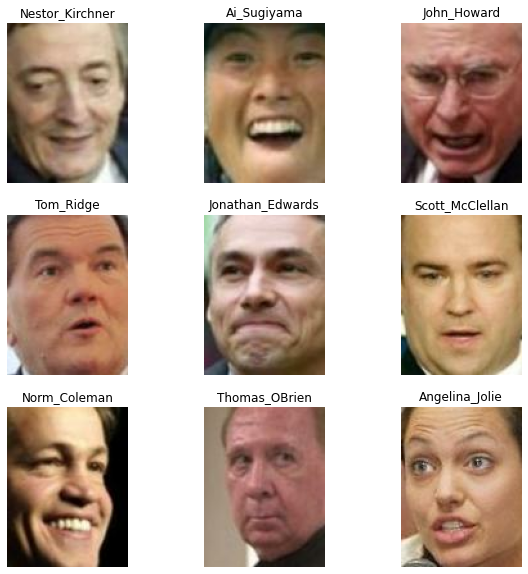

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [223]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(train_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(val_ds))

Number of validation batches: 53
Number of test batches: 14


## Configure dataset performance

In [224]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_ds.prefetch(buffer_size=AUTOTUNE)

## Data augmentation

In [225]:
"""
tf.keras.layers.RandomCrop
tf.keras.layers.RandomFlip
tf.keras.layers.RandomTranslation
tf.keras.layers.RandomRotation
tf.keras.layers.RandomZoom
tf.keras.layers.RandomHeight
tf.keras.layers.RandomWidth
tf.keras.layers.RandomContrast
"""

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

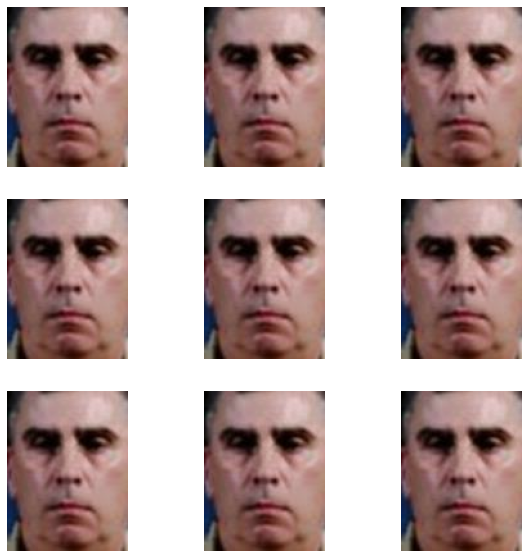

In [226]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

## Rescale pixel values

In [227]:
# preprocess_input = tf.keras.applications.resnet50.preprocess_input

## Building model


In [235]:
# from tensorflow import keras
# from keras.optimizers import SGD
# from keras import Model
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.applications import ResNet50
#
# batch_size = 8
# epochs = 50
# number_of_last_layers_trainable = 10
# learning_rate = 0.001
# nesterov = True
# momentum = 0.9
#
# preprocess_input = keras.applications.resnet.preprocess_input
#
# model = ResNet50(
#     input_shape=[h, w, 3],
#     weights="imagenet",
#     include_top=False,
#     classes=n_classes,
# )
#
# for layer in model.layers[: number_of_last_layers_trainable]:
#     layer.trainable = False
#
# out = model.output
#
# x = Flatten()(out)
# x = Dense(n_classes, activation="softmax")(x)
#
# model = Model(inputs=model.input, outputs=x)
#
# opti = SGD(
#     learning_rate=learning_rate,
#     momentum=momentum,
#     nesterov=nesterov,
# )
#
# model.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])
# #
# # model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opti, metrics=["accuracy"])
#
# model.summary()

#
# from keras.optimizers import SGD
# from keras.applications import ResNet50
#
# epochs = 50
# learning_rate = 0.001
# nesterov = True
# momentum = 0.9
#
# base_model = ResNet50(
#     input_shape=[h, w, 3],
#     weights="imagenet",
#     include_top=False,
#     classes=n_classes,
# )
#
# image_batch, label_batch = next(iter(train_dataset))
# feature_batch = base_model(image_batch)
#
# base_model.trainable = False
#
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(feature_batch_average.shape)
#
# prediction_layer = tf.keras.layers.Dense(n_classes)
# prediction_batch = prediction_layer(feature_batch_average)
# print(prediction_batch.shape)
#
# inputs = tf.keras.Input(shape=(h, w, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
# x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs, outputs)
#
# base_learning_rate = 0.0001
#
# opti = SGD(
#     learning_rate=learning_rate,
#     momentum=momentum,
#     nesterov=nesterov,
# )
#
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=opti, metrics=["accuracy"])
#
# model.summary()

(32, 2048)
(32, 423)
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 125, 94, 3)]      0         
                                                                 
 sequential_56 (Sequential)  (None, None, None, 3)     0         
                                                                 
 tf.__operators__.getitem_9   (None, 125, 94, 3)       0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_9 (TFOpLambd  (None, 125, 94, 3)       0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 4, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d_9   (None, 

## Training

In [236]:
# from keras.callbacks import EarlyStopping
#
# early_stop = EarlyStopping(monitor="val_accuracy", patience=2)
#
# history = model.fit(train_dataset,
#                     validation_data=validation_dataset,
#                     epochs=epochs,
#                     steps_per_epoch=len(train_ds) // batch_size,
#                     validation_steps=len(val_ds) // batch_size,
#                     callbacks=[early_stop])

Epoch 1/50
6/6 [==============================] - 5s 237ms/step - loss: 13.7278 - accuracy: 0.0052 - val_loss: 9.8645 - val_accuracy: 0.0312
Epoch 2/50
6/6 [==============================] - 0s 68ms/step - loss: 13.9129 - accuracy: 0.0052 - val_loss: 11.7846 - val_accuracy: 0.0312
Epoch 3/50
6/6 [==============================] - 0s 69ms/step - loss: 13.3000 - accuracy: 0.0000e+00 - val_loss: 11.0817 - val_accuracy: 0.0312


## Save model

In [230]:
# model.save_weights("../weights/resnet50_lfw.h5")
